# 서울시 통계데이터 활용 
## 서울시 공공데이터 1
> - [SHEET]서울시 자치구 년도별 CCTV 설치 현황
- Datasets 다운 : https://opengov.seoul.go.kr/data/2813905
- 파일이름 : data/public_2017_seoul_cctv_st.csv

In [3]:
# from images import bigpycraft_bda as bpc
# from IPython.display import Image 

import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [4]:
df_cctv = pd.read_csv('./data/opengov_2018_seoul_cctv_status_by_year.csv', encoding='utf-8')
df_cctv.head

<bound method NDFrame.head of      기관명    소계  2013년도 이전  2014년  2015년  2016년
0    강남구  3238       1292    430    584    932
1    강동구  1010        379     99    155    377
2    강북구   831        369    120    138    204
3    강서구   911        388    258    184     81
4    관악구  2109        846    260    390    613
5    광진구   878        573     78     53    174
6    구로구  1884       1142    173    246    323
7    금천구  1348        674     51    269    354
8    노원구  1566        542     57    451    516
9    도봉구   825        238    159     42    386
10  동대문구  1870       1070     23    198    579
11   동작구  1302        544    341    103    314
12   마포구   980        314    118    169    379
13  서대문구  1254        844     50     68    292
14   서초구  2297       1406    157    336    398
15   성동구  1327        730     91    241    265
16   성북구  1651       1009     78    360    204
17   송파구  1081        529     21     68    463
18   양천구  2482       1843    142     30    467
19  영등포구  1277        495    2

In [5]:
df_cctv.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
df_cctv.columns[0]

'기관명'

In [7]:
df_cctv.rename(columns={df_cctv.columns[0] : '구'}, inplace=True)
df_cctv.rename(columns={df_cctv.columns[1] : 'CCTV수'}, inplace=True)
df_cctv.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


## 서울시 공공데이터 2
> - 서울시 주민등록인구 (구별) 통계 데이터
- Datasets 다운 : http://stat.seoul.go.kr/jsp3/index.jsp
- 파일이름 : data/Report_seoul_population_2018_3Q.xls

In [9]:
df_pop_seoul = pd.read_excel('./data/Report_seoul_population_2018_3Q.xls', encoding='utf-8')
df_pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018.3/4,합계,4254018,10068381,4922959,5145422,9793003,4789821,5003182,275378,133138,142240,2.3,1405404
3,2018.3/4,종로구,73696,163086,79301,83785,153396,75024,78372,9690,4277,5413,2.08,26622
4,2018.3/4,중구,61232,135258,66554,68704,125815,62063,63752,9443,4491,4952,2.05,21902


In [12]:
# Image(bpc.BDA_PD_331_1)

In [24]:
population = pd.read_excel('./data/Report_seoul_population_2018_3Q.xls',
                          header = 2,
                          parse_cols = "B, C, D, G, J, N",
                          encoding = 'utf-8')
population.head()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  after removing the cwd from sys.path.


,자치구,세대,계,계.1,계.2,65세이상고령자
0,합계,4254018,10068381,9793003,275378,1405404
1,종로구,73696,163086,153396,9690,26622
2,중구,61232,135258,125815,9443,21902
3,용산구,108777,245087,229391,15696,37443
4,성동구,136831,317197,309251,7946,42581


In [25]:
population.rename(columns = {population.columns[0] : '구',
                            population.columns[1] : '세대수',
                            population.columns[2] : '인구수',
                            population.columns[3] : '한국인',
                            population.columns[4] : '외국인',
                            population.columns[5] : '고령자'}, inplace=True)
# inplace를 false로 하는 경우에는 원본이 변하진 않는다. 다른 변수에 지정해줘야 하는 것.
# 그러나 굳이 새로운 변수를 만들 필요가 없을 때는 원본 자체를 변경시키는 inplace=True 조건을 넣어주면 된다.
population.head()

,구,세대수,인구수,한국인,외국인,고령자
0,합계,4254018,10068381,9793003,275378,1405404
1,종로구,73696,163086,153396,9690,26622
2,중구,61232,135258,125815,9443,21902
3,용산구,108777,245087,229391,15696,37443
4,성동구,136831,317197,309251,7946,42581


### 1단계. CCTV 데이터 파악

In [26]:
df_cctv.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [27]:
df_cctv.sort_values(by='CCTV수', ascending=True).head(10)

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109
12,마포구,980,314,118,169,379
1,강동구,1010,379,99,155,377
23,중구,1023,413,190,72,348
17,송파구,1081,529,21,68,463
13,서대문구,1254,844,50,68,292


In [28]:
df_cctv.sort_values(by='CCTV수', ascending=False).head(10)

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468
20,용산구,2096,1368,218,112,398
6,구로구,1884,1142,173,246,323
10,동대문구,1870,1070,23,198,579
16,성북구,1651,1009,78,360,204
22,종로구,1619,464,314,211,630


In [29]:
df_cctv['최근증가율'] = (df_cctv['2016년']+df_cctv['2015년']+df_cctv['2014년'])/df_cctv['2013년도 이전']*100
df_cctv.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [30]:
df_cctv.sort_values(by='최근증가율', ascending=False).head(10)

,구,CCTV수,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765
19,영등포구,1277,495,214,195,373,157.979798
0,강남구,3238,1292,430,584,932,150.619195
4,관악구,2109,846,260,390,613,149.290780
23,중구,1023,413,190,72,348,147.699758
11,동작구,1302,544,341,103,314,139.338235


### 2단계. 서울시 인구 데이터 파악

In [31]:
population.head()

,구,세대수,인구수,한국인,외국인,고령자
0,합계,4254018,10068381,9793003,275378,1405404
1,종로구,73696,163086,153396,9690,26622
2,중구,61232,135258,125815,9443,21902
3,용산구,108777,245087,229391,15696,37443
4,성동구,136831,317197,309251,7946,42581


In [32]:
population.drop([0], inplace=True)
population.head()

,구,세대수,인구수,한국인,외국인,고령자
1,종로구,73696,163086,153396,9690,26622
2,중구,61232,135258,125815,9443,21902
3,용산구,108777,245087,229391,15696,37443
4,성동구,136831,317197,309251,7946,42581
5,광진구,161714,369999,355032,14967,45202


In [33]:
population['구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [38]:
# population[population['구'].isnull()]
# population.drop([26], inplace=True)
# population.head()

In [39]:
population['외국인비율'] = population['외국인']/population['인구수']*100
population['고령자비율'] = population['고령자']/population['인구수']*100
population.head()

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,73696,163086,153396,9690,26622,5.941650,16.323903
2,중구,61232,135258,125815,9443,21902,6.981472,16.192758
3,용산구,108777,245087,229391,15696,37443,6.404256,15.277432
4,성동구,136831,317197,309251,7946,42581,2.505068,13.424150
5,광진구,161714,369999,355032,14967,45202,4.045146,12.216790


In [40]:
population.sort_values(by='인구수', ascending=False).head(10)

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,269558,673582,666892,6690,80220,0.993198,11.909463
16,강서구,257558,605068,598416,6652,78814,1.099381,13.025643
11,노원구,217900,551069,546911,4158,76466,0.754533,13.875939
23,강남구,228883,549255,544257,4998,66412,0.909960,12.091287
21,관악구,261401,521685,503956,17729,71840,3.398411,13.770762
12,은평구,203951,487849,483417,4432,76643,0.908478,15.710394
15,양천구,176598,469945,466121,3824,57442,0.813712,12.223132
8,성북구,186744,449574,438031,11543,67447,2.567542,15.002425
22,서초구,173912,441539,437407,4132,54887,0.935818,12.430838
17,구로구,172121,439234,406144,33090,61293,7.533570,13.954521


In [46]:
# population.sort_values(by='인구수', ascending=True).head(10)

In [41]:
population.sort_values(by='인구수', ascending=False).head(10)

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,269558,673582,666892,6690,80220,0.993198,11.909463
16,강서구,257558,605068,598416,6652,78814,1.099381,13.025643
11,노원구,217900,551069,546911,4158,76466,0.754533,13.875939
23,강남구,228883,549255,544257,4998,66412,0.909960,12.091287
21,관악구,261401,521685,503956,17729,71840,3.398411,13.770762
12,은평구,203951,487849,483417,4432,76643,0.908478,15.710394
15,양천구,176598,469945,466121,3824,57442,0.813712,12.223132
8,성북구,186744,449574,438031,11543,67447,2.567542,15.002425
22,서초구,173912,441539,437407,4132,54887,0.935818,12.430838
17,구로구,172121,439234,406144,33090,61293,7.533570,13.954521


In [48]:
# population.sort_values(by='인구수', ascending=True).head(10)

In [42]:
population.sort_values(by='외국인비율', ascending=False).head(10)

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,170208,403724,368577,35147,55364,8.705700,13.713329
18,금천구,106774,252359,232760,19599,35299,7.766317,13.987613
17,구로구,172121,439234,406144,33090,61293,7.533570,13.954521
2,중구,61232,135258,125815,9443,21902,6.981472,16.192758
3,용산구,108777,245087,229391,15696,37443,6.404256,15.277432
1,종로구,73696,163086,153396,9690,26622,5.941650,16.323903
6,동대문구,162232,366101,350556,15545,57096,4.246096,15.595696
5,광진구,161714,369999,355032,14967,45202,4.045146,12.216790
13,서대문구,138027,322497,310584,11913,50278,3.693988,15.590223
21,관악구,261401,521685,503956,17729,71840,3.398411,13.770762


In [50]:
# population.sort_values(by='외국인비율', ascending=True).head(10)

In [43]:
population.sort_values(by='고령자', ascending=False).head(10)

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,269558,673582,666892,6690,80220,0.993198,11.909463
16,강서구,257558,605068,598416,6652,78814,1.099381,13.025643
12,은평구,203951,487849,483417,4432,76643,0.908478,15.710394
11,노원구,217900,551069,546911,4158,76466,0.754533,13.875939
21,관악구,261401,521685,503956,17729,71840,3.398411,13.770762
8,성북구,186744,449574,438031,11543,67447,2.567542,15.002425
23,강남구,228883,549255,544257,4998,66412,0.909960,12.091287
17,구로구,172121,439234,406144,33090,61293,7.533570,13.954521
7,중랑구,180044,409058,404313,4745,61271,1.159982,14.978560
20,동작구,175873,407925,395513,12412,58803,3.042716,14.415150


In [52]:
# population.sort_values(by='고령자', ascending=True).head(10)

In [44]:
population.sort_values(by='고령자비율', ascending=False).head(10)

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,143172,324276,320576,3700,57741,1.141003,17.806128
1,종로구,73696,163086,153396,9690,26622,5.941650,16.323903
2,중구,61232,135258,125815,9443,21902,6.981472,16.192758
10,도봉구,137901,342990,340876,2114,55499,0.616344,16.180938
12,은평구,203951,487849,483417,4432,76643,0.908478,15.710394
6,동대문구,162232,366101,350556,15545,57096,4.246096,15.595696
13,서대문구,138027,322497,310584,11913,50278,3.693988,15.590223
3,용산구,108777,245087,229391,15696,37443,6.404256,15.277432
8,성북구,186744,449574,438031,11543,67447,2.567542,15.002425
7,중랑구,180044,409058,404313,4745,61271,1.159982,14.978560


In [54]:
# population.sort_values(by='고령자비율', ascending=True).head(10)

### Tip. DataFrame 병합

In [55]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [56]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [57]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [58]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [59]:
result = pd.concat([df1, df2, df3])   # default axis=0
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [60]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [61]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [78]:
result.index.get_level_values(0)

RangeIndex(start=0, stop=8, step=1)

In [63]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [64]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [65]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

## concat은 단순히 붙여주는 것.

In [66]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [67]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [69]:
result
## 같은 index를 가진 요소들은 그대로 들어가지만, 맞지 않은 경우에는 NaN값이 들어가는 것이다.

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [71]:
result = pd.concat([df1, df4], axis=1, join='inner')
result
# 양쪽이 모두 mapping  되는 요소들만 남기고 조인하는 것.

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [74]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result
# df1의 index값을 기준으로 합치는 것.

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [75]:
result = pd.concat([df1, df4], ignore_index=True)
result
# index를 무시하고 같은 value 형식을 가진 값들을 행으로 묶어준다. 
# F의 경우에는 해당되는 열이 없기 때문에 새로 column 생성.

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [79]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [80]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [81]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [83]:
pd.merge(left, right, on='key')
# left와 right를 합치는데, 기준은 'key'값으로 하라는 명령어

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [85]:
pd.merge(left, right, how='left', on='key')
# left값을 그대로 두고, key값을 기준으로 right의 값들을 합친다.
# 해당하지 않는 요소들은 NaN값으로 채운다.

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [89]:
pd.merge(right, left, how='left', on='key')

####????????????????????????????????????????????????
### ??????? dataframe left랑 how의 left랑은 다른 요소인건가????

,key,C,D,A,B
0,K0,C0,D0,A0,B0
1,K1,C1,D1,NaN,NaN
2,K2,C2,D2,A2,B2
3,K3,C3,D3,A3,B3


In [86]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [87]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [88]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


### 3단계. CCTV 데이터와 인구 데이터 합치고 분석

In [90]:
data_result = pd.merge(df_cctv, population, on='구')
data_result.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287
1,강동구,1010,379,99,155,377,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948
2,강북구,831,369,120,138,204,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128
3,강서구,911,388,258,184,81,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643
4,관악구,2109,846,260,390,613,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762


In [91]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287
1,강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948
2,강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128
3,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643
4,관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762


In [92]:
data_result.set_index('구', inplace=True)
data_result.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,,
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762


### 상관 분석(correlation analysis)
> - 상관 분석(correlation analysis)은 확률론과 통계학에서 두 변수간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
- 두변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며
- 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다.
- 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수 ρ를 사용한다.
- 상관관계의 정도를 파악하는 상관계수(Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다.
- 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

In [97]:
! pip list

Package                            Version  
---------------------------------- ---------
alabaster                          0.7.10   
anaconda-client                    1.6.14   
anaconda-navigator                 1.8.7    
anaconda-project                   0.8.2    
asn1crypto                         0.24.0   
astroid                            1.6.3    
astropy                            3.0.2    
attrs                              18.1.0   
Babel                              2.5.3    
backcall                           0.1.0    
backports.shutil-get-terminal-size 1.0.0    
beautifulsoup4                     4.6.0    
bitarray                           0.8.1    
bkcharts                           0.2      
blaze                              0.11.3   
bleach                             2.1.3    
bokeh                              0.12.16  
boto                               2.48.0   
Bottleneck                         1.2.1    
certifi                            2018.4.16
cffi      

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [93]:
np.corrcoef(data_result['고령자비율'], data_result['CCTV수'])

array([[ 1.        , -0.27533083],
       [-0.27533083,  1.        ]])

In [94]:
np.corrcoef(data_result['외국인비율'], data_result['CCTV수'])

array([[ 1.        , -0.04796912],
       [-0.04796912,  1.        ]])

In [95]:
np.corrcoef(data_result['인구수'],data_result['CCTV수'])

array([[1.       , 0.2242953],
       [0.2242953, 1.       ]])

In [96]:
data_result.sort_values(by='CCTV수', ascending=False).head(10)

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,,
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287
양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762
은평구,2108,85.237258,203951,487849,483417,4432,76643,0.908478,15.710394
용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432
구로구,1884,64.973730,172121,439234,406144,33090,61293,7.533570,13.954521
동대문구,1870,74.766355,162232,366101,350556,15545,57096,4.246096,15.595696
성북구,1651,63.627354,186744,449574,438031,11543,67447,2.567542,15.002425


In [98]:
data_result.sort_values(by='인구수', ascending=False).head(10)


,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,,
송파구,1081,104.347826,269558,673582,666892,6690,80220,0.993198,11.909463
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643
노원구,1566,188.929889,217900,551069,546911,4158,76466,0.754533,13.875939
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762
은평구,2108,85.237258,203951,487849,483417,4432,76643,0.908478,15.710394
양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132
성북구,1651,63.627354,186744,449574,438031,11543,67447,2.567542,15.002425
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838


### 4단계. CCTV와 인구현황 그래프로 분석


In [99]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [100]:
data_result.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,,
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762


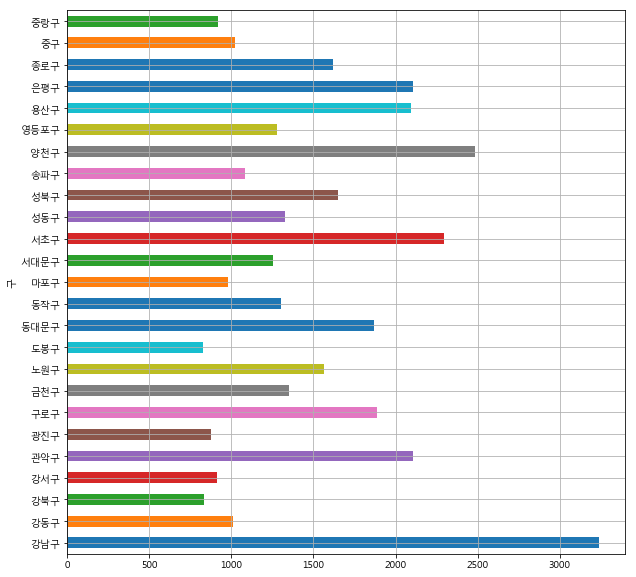

In [101]:
plt.figure()
data_result['CCTV수'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

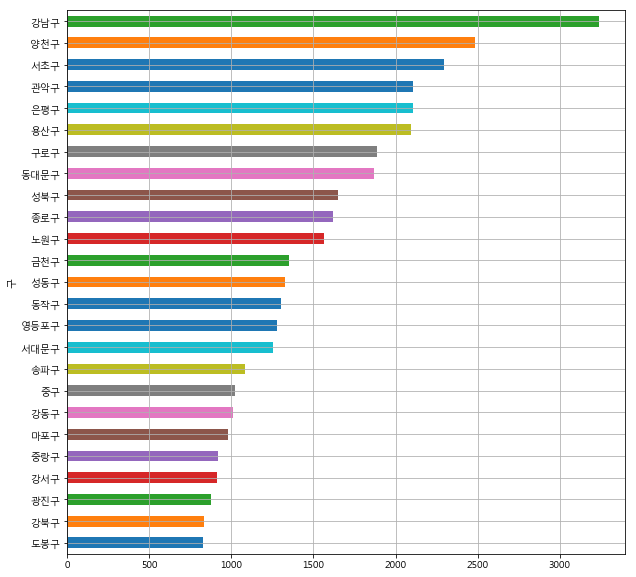

In [102]:
data_result['CCTV수'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

In [103]:
data_result['CCTV비율'] = data_result['CCTV수']/data_result['인구수']*100
data_result.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구,,,,,,,,,,
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948,0.232188
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267


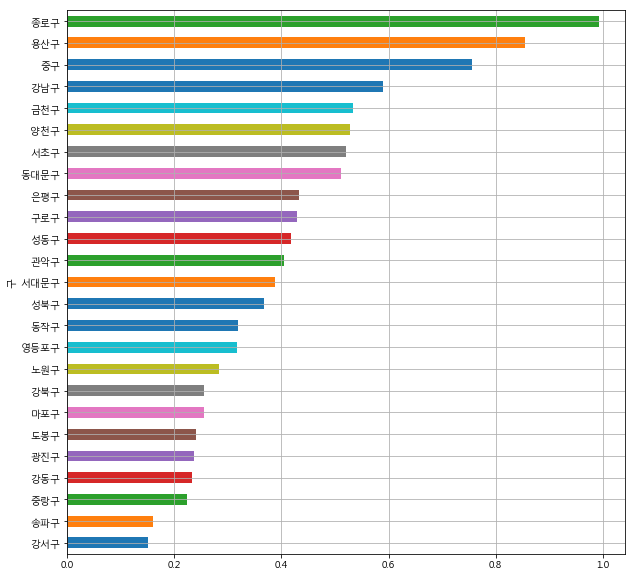

In [104]:
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
# grid는 격자무늬를 넣어주는 것.
plt.show()

In [106]:
# data_result['CCTV비율'].sort_values().plot(kind='barh', grid=False, figsize=(10, 10))
# plt.show()

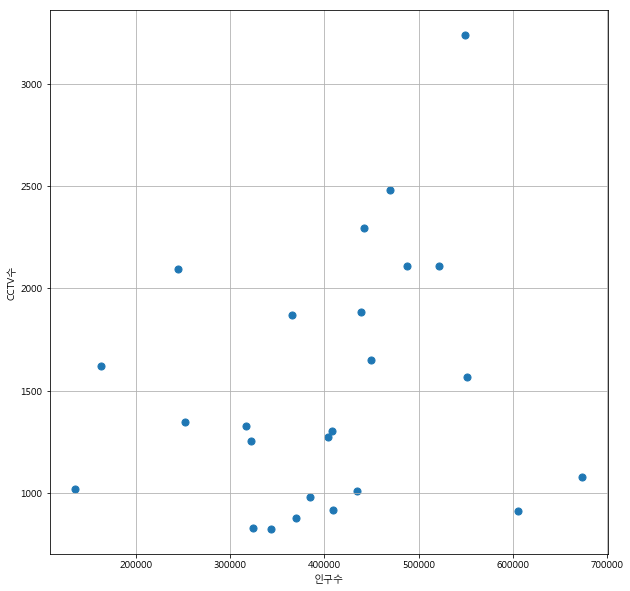

In [107]:
plt.figure(figsize=(10, 10))
plt.scatter(data_result['인구수'], data_result['CCTV수'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()

In [108]:
fp1 = np.polyfit(data_result['인구수'], data_result['CCTV수'], 1)
fp1
# 오차 범위를 줄여주는 함수가 polyfit

array([1.08180882e-03, 1.07963746e+03])

In [109]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
# 점을 찍어줄 수 있는 범위 지정

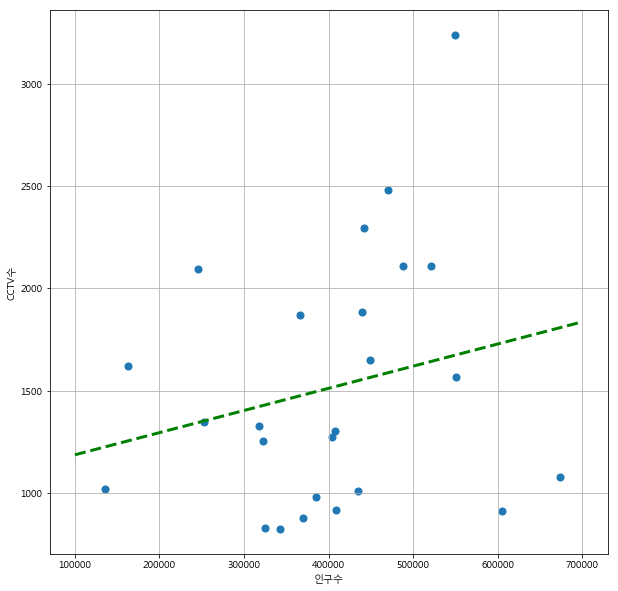

In [110]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['CCTV수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()

### 5단계. 그래프에 의미 부여

In [111]:
fp1 = np.polyfit(data_result['인구수'], data_result['CCTV수'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['CCTV수'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구,,,,,,,,,,,
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,0.855207,751.225257
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750


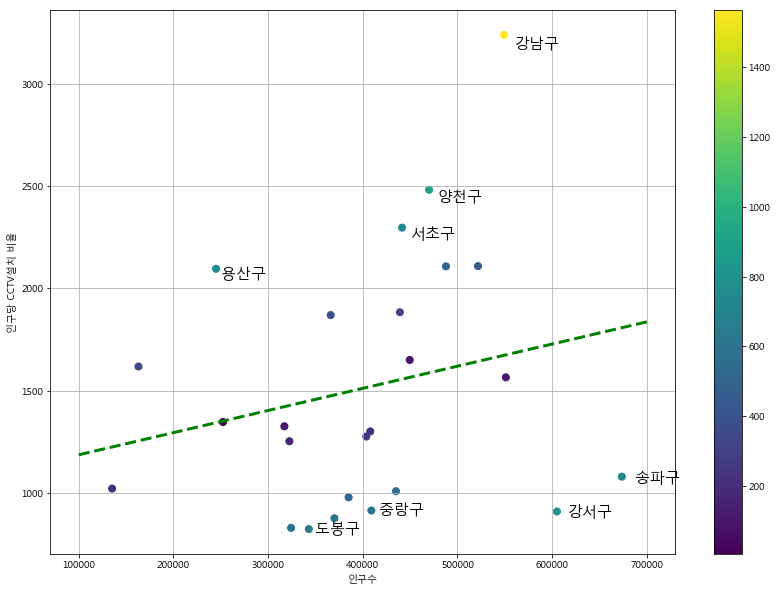

In [112]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['CCTV수'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(8):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['CCTV수'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당 CCTV설치 비율')
plt.colorbar()
plt.grid()
plt.show()

## 서울시 구별 인구수와 CCTV설치 비율에 대한 분석 결과
- 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 용산구는 CCTV가 많지만,
- 송파구, 강서구, 도봉구, 중랑구는 다른 구에 비해 CCTV 비율이 낮다

In [117]:
df_sort.to_csv('data/seoul_population_cctv.csv', sep=',', index=False, encoding='euc-kr')
# file 저장 시에는 to_csv를 넣어주면 된다.

In [114]:
df_sort.to_csv('data/seoul_population_cctv2.csv', sep=',', index=False, encoding='utf-8')